In [240]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import os

In [241]:
def change_file_name(folder_path, name:str):
    """
    Change file names to more readable ^_^
    :param folder_path: path to dictionary with images
    :param name: new file\s name\s
    """
    # Переходим в папку с фотографиями
    os.chdir(folder_path)

    # Получаем список файлов в папке
    file_list = os.listdir()

    # Расширения файлов, которые вы хотите обрабатывать
    extensions = ['.jpg', '.jpeg', '.png']

    # Проходимся по каждому файлу и проверяем расширение
    for index, file_name in enumerate(file_list):
        # Получаем расширение файла
        file_ext = os.path.splitext(file_name)[1].lower()  # Получаем расширение и приводим его к нижнему регистру

        # Проверяем, что расширение файла находится в списке разрешенных
        if file_ext in extensions:
            # Новое имя файла (можно настроить согласно вашим требованиям)
            new_name = f"{name}_{index}{file_ext}"  # Пример нового имени: photo_0.jpg, photo_1.png и т.д.

            # Полный путь к текущему файлу
            current_path = os.path.join(folder_path, file_name)

            # Полный путь к новому файлу
            new_path = os.path.join(folder_path, new_name)
            try:
                # Переименовываем файл
                os.rename(current_path, new_path)
                print(f"Файл {file_name} переименован в {new_name}")
            except FileExistsError:
                new_name = f"test_photo_{index+1}{file_ext}"
                print(f"Файл {file_name} переименован в {new_name}")
        else:
            print(f"Файл {file_name} имеет неподдерживаемое расширение и будет проигнорирован.")

In [242]:
# folder_path = r'C:\Users\spark\PycharmProjects\image_face_recognition\data\test_images'
# change_file_name(folder_path, "test_photo")

Тут мы грузим фотку и смотри на то что она ргб
- Первое число (1280) представляет ширину изображения в пикселях.
- Второе число (960) представляет высоту изображения в пикселях.
- Третье число (3) обозначает количество каналов цвета. В данном случае, это RGB

In [243]:
#TODO: ПРОБЛЕМА С ПУТЕМ ЧТО ЗА ХУЙНЯ
img = cv2.imread(r'C:\Users\spark\PycharmProjects\image_face_recognition\data\test_images\test_photo_2.jpg')
img.shape

(1280, 961, 3)

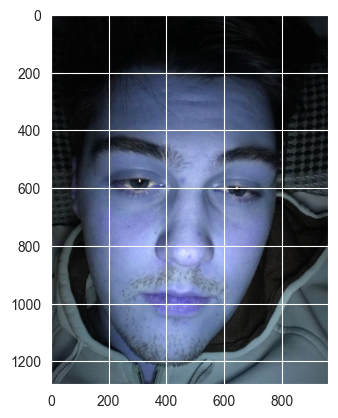

In [244]:
plt.imshow(img)

Получаем странную картинку потому что:
Matplotlib ожидает цветовое пространство RGB для отображения изображений.
Если изображение загружается в другом цветовом пространстве (например, BGR, как это делает OpenCV по умолчанию), цвета могут выглядеть неожиданным образом.
Можно воспользоваться функцией cv2.cvtColor() для конвертации цветового пространства из BGR в RGB

In [245]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1280, 961)

Убираем RGB и получаем один канал т.е. black and white.

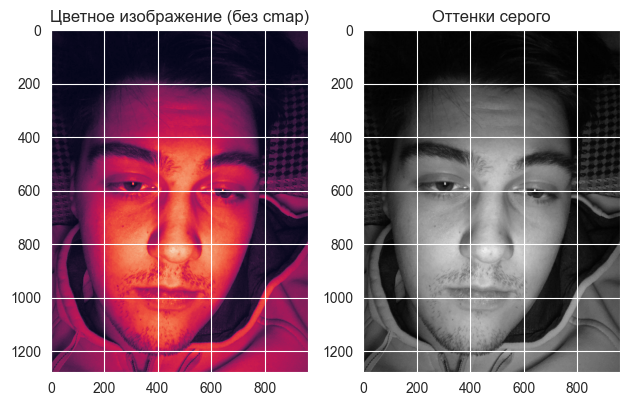

In [246]:
# Отображение первого изображения
plt.subplot(1, 2, 1)
plt.imshow(gray)
plt.title('Цветное изображение (без cmap)')

# Отображение второго изображения (в оттенках серого)
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Оттенки серого')

plt.tight_layout()  # Автоматическое выравнивание для улучшения визуализации
plt.show()

In [247]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\spark\PycharmProjects\image_face_recognition\haars\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Users\spark\PycharmProjects\image_face_recognition\haars\haarcascade_eye.xml')

# faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces = face_cascade.detectMultiScale(gray, 1.2, 4)
faces

array([[ 88, 365, 755, 755]])

Используем библиотеки opencv2 и находим лицо (координаты). Если дать на вход картинку без лица, то получаем пустой массив.


Про detectMultiScale
- scaleFactor (масштабный коэффициент): Он определяет, насколько изображение уменьшается на каждом уровне анализа. Значение 1.3 означает, что каждый раз изображение уменьшается на 30%. Этот параметр помогает алгоритму учитывать объекты разных размеров на изображении. Уменьшение масштаба позволяет обнаруживать объекты разного размера, но может увеличить количество ложных срабатываний.

- minNeighbors (минимальное количество соседей): После обнаружения квадратных областей, которые могут содержать объекты, этот параметр определяет, сколько соседних прямоугольников должно быть обнаружено, чтобы считать обнаруженную область действительным объектом. Значение 5 означает, что обнаруженная область будет считаться действительной только в том случае, если она имеет по меньшей мере 5 соседей с одинаковым объектом. Это помогает отфильтровать ложные обнаружения.


In [248]:
(x,y,w,h) = faces[0]
x,y,w,h

(88, 365, 755, 755)

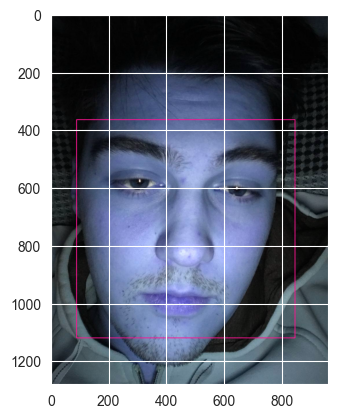

In [249]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255, 20, 147),2)
plt.imshow(face_img)

Так как на выходе face_cascade нам дает x и y + ширину и высоту, смотрим на эти данные и по ним рисуем прямоугольник розового цвета (можно не розового).

[34969, 25281, 2025]


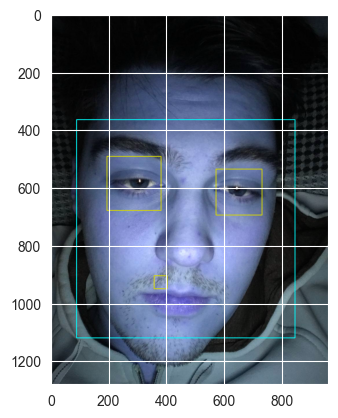

In [250]:
#Код с официального сайта open cv
cv2.destroyAllWindows()
area = []


for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0, 255, 255),2)

    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)

    for number, (ex,ey,ew,eh) in enumerate(eyes):

        area.append(ew * eh)

        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(215, 215, 0),2)

print(area)
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

Меняем стратегию на желто-синюю расцветку.

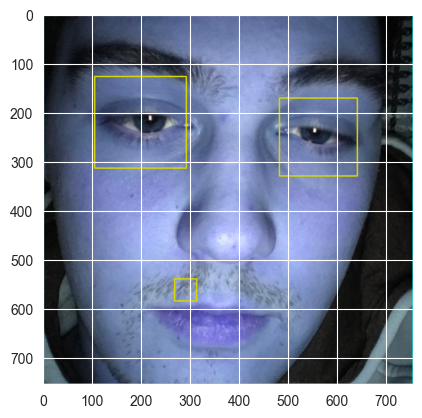

In [251]:
plt.imshow(roi_color, cmap='gray')

In [252]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

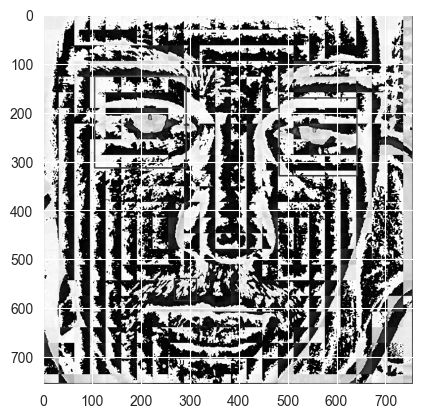

In [253]:
im_har = w2d(roi_color,'db1',5)
plt.imshow(im_har, cmap='gray')